<a href="https://colab.research.google.com/github/Andyzxm/GEOG_520_open_source_method/blob/main/A7_Xinming_Andy_Zhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

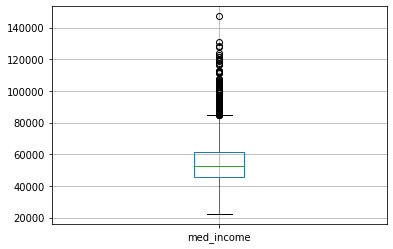

In [ ]:
#Task 1  Generate a box plot showing the distribution of county-level median income (“med_income”) for all counties in the dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
USC= pd.read_csv("/content/drive/MyDrive/GEOG520_python_data/datasets/datasets/us_county_data.csv")
USC.dropna(axis=0)

USC.boxplot(column='med_income')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


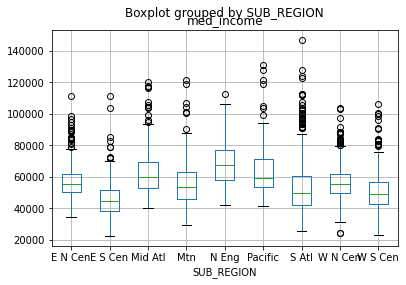

In [ ]:
#Task 2 : Generate a grouped box plot showing the distribution of county-level median income (“med_income”) grouped by subregion of the country (“SUB_REGION”)
USC.boxplot(column='med_income', by='SUB_REGION')
plt.show(USC.boxplot)

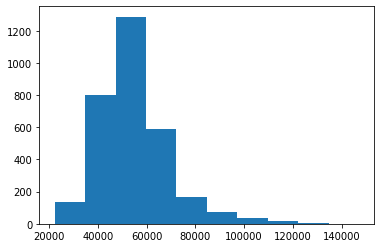

In [ ]:
#Task 3 : Generate a histogram showing the distribution of county-level median income (“med_income”) for all counties in the dataset.

USC_hist=plt.hist(USC.med_income)

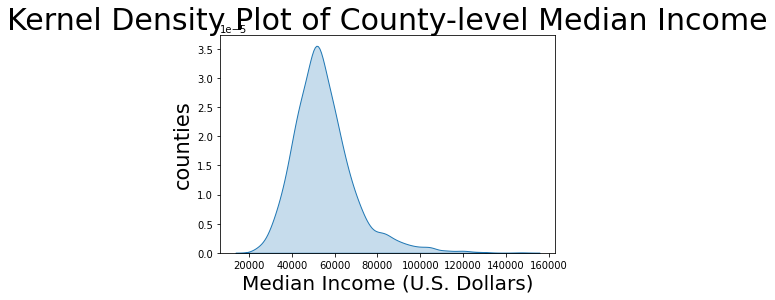

In [ ]:
#Task4 Generate a kernel density plot showing the distribution of county-level median income (“med_income”) for all counties in the dataset
kde_plot, axs = plt.subplots(1,1)
sns.kdeplot(ax=axs, x = "med_income",data = USC, shade = True)
axs.set_title("Kernel Density Plot of County-level Median Income", fontsize=30)
axs.set_xlabel("Median Income (U.S. Dollars)", fontsize= 20)
axs.set_ylabel("counties", fontsize=21)
plt.show(kde_plot)


Text(0, 0.5, 'Counties')

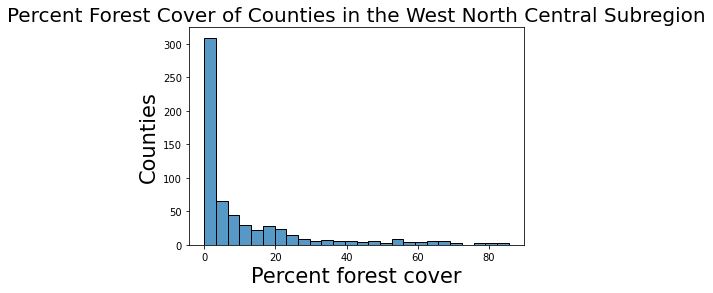

In [ ]:
#Task 5 : Generate a histogram showing the distribution of county-level percent forest cover (“per_for”) 
#for only counties occurring in the West North Central (“W N Cen”)subregion (“SUB_REGION”)
Wncen=USC.query('SUB_REGION== "W N Cen"' )

per_for, axs = plt.subplots(1,1)
sns.histplot(x = "per_for",data = Wncen)
axs.set_title("Percent Forest Cover of Counties in the West North Central Subregion", fontsize=20)
axs.set_xlabel("Percent forest cover", fontsize= 21)
axs.set_ylabel("Counties", fontsize=21)

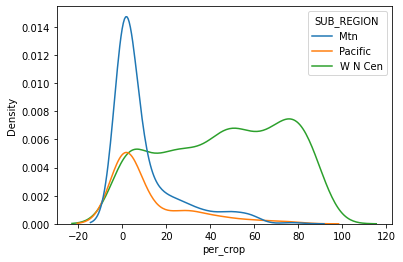

In [ ]:
#Task 6 Generate grouped kernel density plots showing the distribution of countylevel percent cropland (“per_crop”) for only counties occurring in the West North
#Central (“W N Cen”), Pacific (“Pacific”), and Mountain (“Mtn”) subregions(“SUB_REGION”). Each subregion should have a separate density plot in the graph space.

threesubregion = USC.query('(SUB_REGION == "W N Cen") | (SUB_REGION == "Pacific") | (SUB_REGION == "Mtn") ')
sns.kdeplot(x = "per_crop", hue = "SUB_REGION", data = threesubregion)


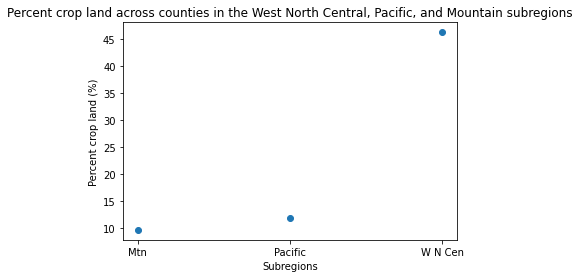

In [ ]:
#Task 7 : Generate a dot plot showing the mean percent crop land (“per_crop”) for onlycounties occurring in the West North Central (“W N Cen”), Pacific (“Pacific”), and Mountain (“Mtn”) subregions (“SUB_REGION”).

countygroup = USC.query('(SUB_REGION == "W N Cen") | (SUB_REGION == "Pacific") | (SUB_REGION == "Mtn")')
countycrop = countygroup.groupby("SUB_REGION")["per_crop"].mean()
countycrop = countycrop.to_frame()
countycrop.index.name = 'subregion'
countycrop.reset_index(inplace=True)

crop_subreg = plt.scatter(x = 'subregion', y = "per_crop", data = countycrop)
plt.title("Percent crop land across counties in the West North Central, Pacific, and Mountain subregions")
plt.xlabel("Subregions")
plt.ylabel("Percent crop land (%)")
plt.show(crop_subreg)


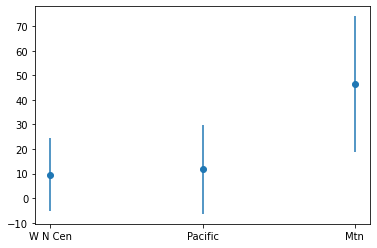

In [ ]:
#Task 8 Add error bars to Graph 7 showing 1 standard deviation above and below the mean for each subregion separately
subregion3=USC.query('(SUB_REGION == "W N Cen") | (SUB_REGION == "Pacific") | (SUB_REGION == "Mtn")')
csub= ["W N Cen", "Pacific", "Mtn"]
CMeans= subregion3.groupby("SUB_REGION")["per_crop"].mean()
cstd= subregion3.groupby("SUB_REGION")["per_crop"].std()
CDict= { "Subregion" : csub,
    "Means" : CMeans,
    "Std" : cstd
}
cm= pd.DataFrame(CDict)
cm
fig=plt.errorbar (x=cm.Subregion, y=cm.Means, yerr=cm.Std, fmt = "o")
plt.show(fig)

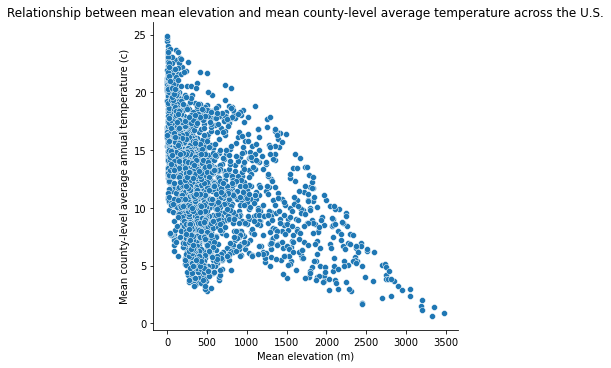

In [ ]:
#Task 9  Create a scatter plot showing the relationship between mean elevation (“dem”) and mean county-level average annual temperature (“tempmn”) for all counties in the country.
Elev_temp = sns.relplot(x="dem", y="tempmn", data = USC)
Elev_temp.set(xlabel ="Mean elevation (m)", ylabel = "Mean county-level average annual temperature (c)", title = "Relationship between mean elevation and mean county-level average temperature across the U.S.")
plt.show(Elev_temp)

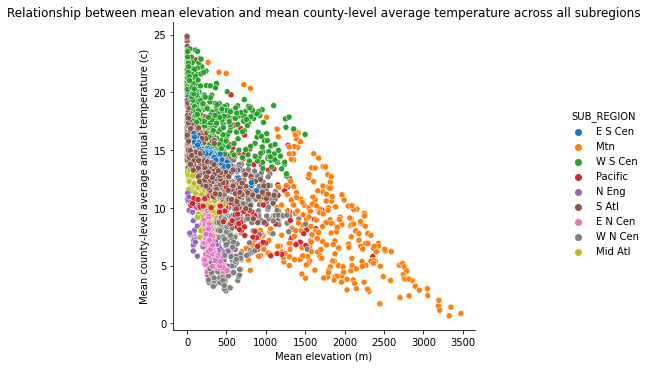

In [ ]:
#Task 10 Replicate Graph 9 but now differentiate the subregions (“SUB_REGION”) by using different colors or point symbols. 
Elev_temp = sns.relplot(x="dem", y="tempmn", hue = "SUB_REGION", data = USC)
Elev_temp.set(xlabel ="Mean elevation (m)", ylabel = "Mean county-level average annual temperature (c)", title = "Relationship between mean elevation and mean county-level average temperature across all subregions")
plt.show(Elev_temp)

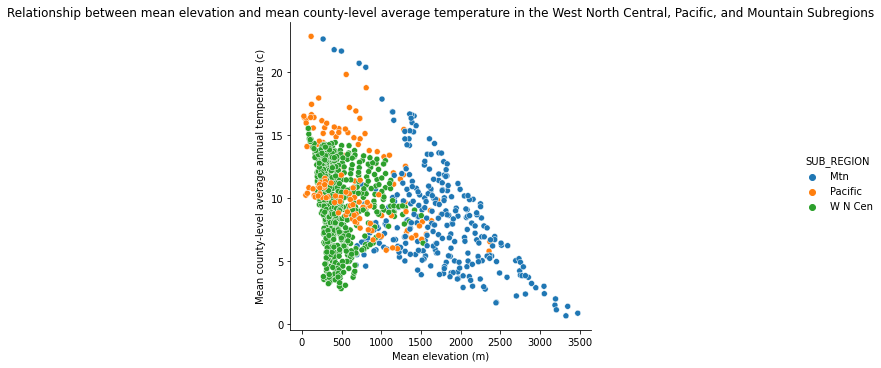

In [ ]:
#Task 11 Create a scatter plot showing the relationship between mean elevation (“dem”) and mean county-level average annual temperature (“tempmn”) for only counties occurring in the West North Central (“W N Cen”), Pacific (“Pacific”), and Mountain (“Mtn”) subregions. Differentiate the subregions (“SUB_REGION”) by using different colors or point symbols.

Elev_temp = sns.relplot(x="dem", y="tempmn", hue = "SUB_REGION", data = subregion3)
Elev_temp.set(xlabel ="Mean elevation (m)", ylabel = "Mean county-level average annual temperature (c)", title = "Relationship between mean elevation and mean county-level average temperature in the West North Central, Pacific, and Mountain Subregions")
plt.show(Elev_temp)

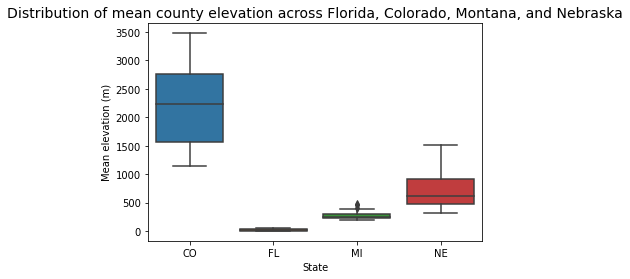

In [ ]:
#Task 12 Generate a grouped box plot showing the distribution of mean county elevation (“dem”) grouped by state (“STATE_NAME” or “STATE_ABBR”) for only counties occurring in Florida, Colorado, Montana, and Nebraska.
countygroup=USC.query('(STATE_ABBR == "FL") | (STATE_ABBR == "CO") | (STATE_ABBR == "MI") | (STATE_ABBR == "NE")')
county_Elev, axs = plt.subplots(1,1)
sns.boxplot(ax=axs, x = "STATE_ABBR", y = "dem", data = countygroup)
axs.set_title("Distribution of mean county elevation across Florida, Colorado, Montana, and Nebraska", fontsize=14)
axs.set_xlabel("State", fontsize= 10)
axs.set_ylabel("Mean elevation (m)", fontsize=10)
plt.show(county_Elev)

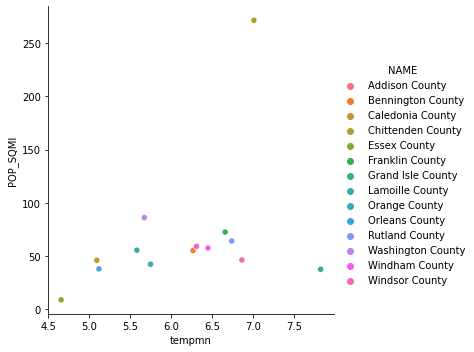

In [ ]:
#Task 13 Generate a scatterplot for only counties occurring in Vermont to compare the population density (“POP_SQMI”) and mean county-level average annual temperature (“tempmn”)
Vermont_pop=USC.query('STATE_NAME == "Vermont"')
Vermont_temp=sns.relplot(x = "tempmn", y = "POP_SQMI", hue="NAME" ,data = Vermont_pop)

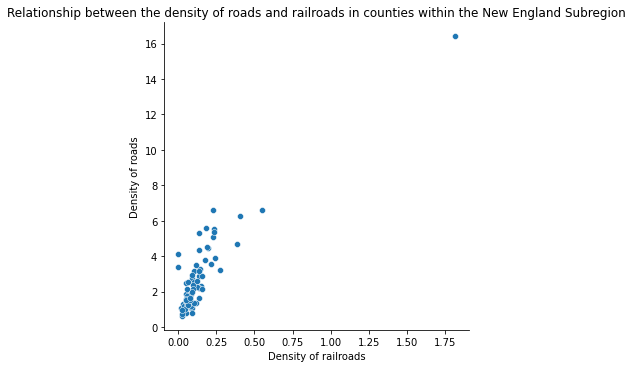

In [ ]:
#Task 14 Generate a scatterplot showing the relationship between the density of railroads (“rail_den”) and roads (“road_den”) for just counties occurring in the New England (“N Eng”) subregion (“SUB_REGION”)
NEWen=USC.query('SUB_REGION == "N Eng"')
Rail_Roads = sns.relplot(x = "rail_den", y = "road_den", data = NEWen)
Rail_Roads.set(xlabel ="Density of railroads", ylabel = "Density of roads", title = "Relationship between the density of roads and railroads in counties within the New England Subregion")

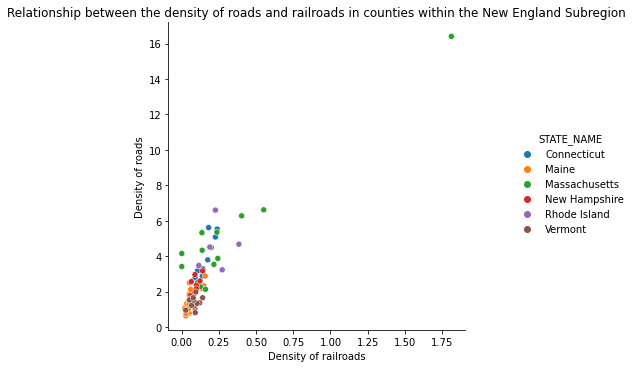

In [ ]:
#Task 15Generate a scatterplot showing the relationship between the density of railroads (“rail_den”) and roads (“road_den”) for just counties occurring in the New England (“N Eng”) subregion (“SUB_REGION”)
NEWen=USC.query('SUB_REGION == "N Eng"')
Rail_Roads = sns.relplot(x = "rail_den", y = "road_den", hue= "STATE_NAME" ,data = NEWen)
Rail_Roads.set(xlabel ="Density of railroads", ylabel = "Density of roads", title = "Relationship between the density of roads and railroads in counties within the New England Subregion")
plt.show(Rail_Roads)
